In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sks
from sklearn.metrics import classification_report
import seaborn as sns


In [0]:
df = pd.read_csv("conversion_data.csv")

In [3]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [0]:
df.age = df.age.apply(lambda x : 80 if x > 80 else x)

In [5]:
df.isnull().any()

country                False
age                    False
new_user               False
source                 False
total_pages_visited    False
converted              False
dtype: bool

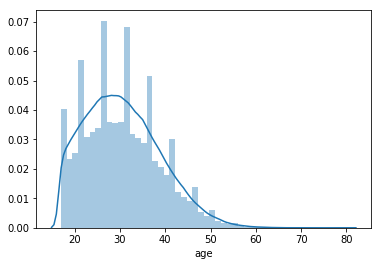

In [6]:
sns.distplot(df.age)

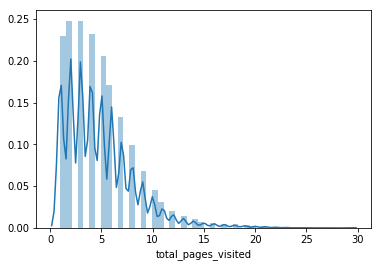

In [7]:
sns.distplot(df.total_pages_visited)

In [0]:
sns.catplot(df.total_pages_visited,kind="box",data = df)

In [0]:
sns.lmplot(x="total_pages_visited", y="converted", data=df, logistic=True)

In [0]:
match_by_age = df[["age","converted"]].groupby(["age","converted"]).size().unstack()

print(match_by_age.index)

#plt.plot(match_by_age[0])
plt.plot(match_by_age[1])
plt.show()


In [0]:
by_country = df.groupby(by="country").sum()

In [0]:
by_country.head()

In [0]:
#plt.plot( by_country.converted)
sns.barplot(by_country.converted,by_country.index)

In [0]:
by_source = df.groupby(by="source").sum()

In [0]:
by_source

In [0]:

sns.barplot(by_source.converted,by_source.index)

In [0]:
df.converted.mean()

In [0]:
df = pd.get_dummies(df)

In [0]:
from sklearn.feature_selection import chi2

In [0]:
X = df.drop("converted", axis = 1)
y = df.converted

In [0]:
X.sample()

In [0]:
X.isnull().any()

In [0]:
chi2 = chi2(X,y)
chi2

In [0]:
df_selec = pd.DataFrame(chi2,
				   index=["chi2-score","p-value"], columns = df.drop("converted", axis = 1).columns)
df_selec = df_selec.T.sort_values(by="chi2-score",ascending = False)

In [0]:
df_selec

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split  (X, y, test_size=0.3, stratify = y, random_state=42)

In [0]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()

sc_x_fit = sc_x.fit(X_train)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)

In [0]:
from sklearn.linear_model import LogisticRegression
logisticreg = LogisticRegression() # on définit le modèle de régression logistique à appliquer aux données

logisticreg.fit(X_train, y_train) # estimation du modèle
logisticreg.score(X_test, y_test) # la précision du modèle

In [0]:
y_pred = logisticreg.predict(X_test) # predictions du modèle


In [0]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) # on calcule la matrice de confusion

In [0]:
import seaborn as sns

In [0]:
sns.heatmap(cm, annot = True, fmt="d")

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logisticreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
print("Rapport pour le modèle log :",
      classification_report(y_test,y_pred) ,sep="\n")

In [0]:
''' k fold cross validation
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

# le code ci-dessous permet de générer les 10 séparation train/test pour
# la 10-folds cross-validation
for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      X_KF_train, X_KF_test = X_train[train_index], X_train[test_index]
      y_KF_train, y_KF_test = y_train[train_index], y_train[test_index]

# cette méthode permet d'obtenir rapidement des score de précisions
# pour e=les différents modèles estimés par cross-validation      
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
scores = cross_val_score(logisticreg, X, y, cv=10)
predictions = cross_val_predict(logisticreg, X, y, cv=10)'''

In [0]:
from imblearn.combine import SMOTEENN
comb_echant=SMOTEENN()

#%%
# on applique la méthode fit_sample() sur nos données
X_comb, y_comb= comb_echant.fit_sample(X_train, y_train)
# on le transforme en Series pour avoir un affichage plus agréable
pd.Series(y_comb).value_counts()

In [0]:
logisticreg.fit(X_comb, y_comb) # estimation du modèle
logisticreg.score(X_comb, y_comb) # la précision du modèle

In [0]:
y_pred = logisticreg.predict(X_test) # predictions du modèle
cm = metrics.confusion_matrix(y_test, y_pred) # on calcule la matrice de confusion

In [0]:
logisticreg.intercept_

In [0]:
sns.heatmap(cm, annot = True, fmt="d")

In [0]:
logit_roc_auc = roc_auc_score(y_test, logisticreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
print("Rapport pour le modèle log SMOOT :",
      classification_report(y_test,y_pred) ,sep="\n")

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(n_estimators=200, max_depth=4,random_state=0)

In [0]:
rf.fit(X_train, y_train)

In [0]:
logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':[20,50,100,200], 'max_depth':[ 3,4, 5,8,10]}
rf_grid = GridSearchCV(rf, parameters, cv=5)
rf_grid.fit(X_comb, y_comb)


In [0]:
#rf.fit(X_comb, y_comb)

In [0]:
rf_grid.best_params_

In [0]:
logit_roc_auc = roc_auc_score(y_test, rf_grid.best_estimator_.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_grid.best_estimator_.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [0]:
from sklearn.svm import SVC
#clf = SVC(gamma="scale",probability=True)
#clf.fit(X_train, y_train) 


In [0]:
'''logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()'''

In [0]:
from sklearn.svm import SVC
#clf = SVC(gamma='scale',probability=True)
#clf.fit(X_comb, y_comb) 

In [0]:
'''logit_roc_auc = roc_auc_score(y_test, clf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()'''